In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential  # Corrected import statement
from keras.layers import Dense, LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import ConvLSTM2D


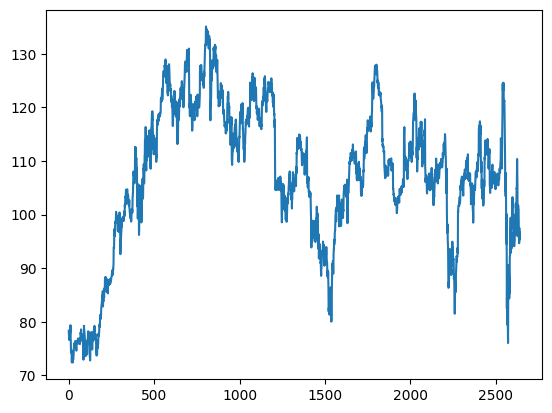

In [ ]:
dataframe = read_csv('IBM Research.csv', usecols=[5])
len(dataframe)
plt.plot(dataframe)

In [ ]:
len(dataframe)

2640

In [ ]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
scaler =  MinMaxScaler(feature_range=(0,1))

In [ ]:
dataset = scaler.fit_transform(dataset)
dataset

array([[0.0949235 ],
       [0.07982576],
       [0.0718056 ],
       ...,
       [0.38878047],
       [0.36491895],
       [0.39811766]], dtype=float32)

In [ ]:
train_size = int(len(dataset) * 0.94)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
train

array([[0.0949235 ],
       [0.07982576],
       [0.0718056 ],
       ...,
       [0.58221805],
       [0.58892953],
       [0.58791685]], dtype=float32)

In [ ]:
test

array([[0.56081474],
       [0.5623348 ],
       [0.54827714],
       [0.5421982 ],
       [0.5472641 ],
       [0.5461242 ],
       [0.54878354],
       [0.5320668 ],
       [0.5401721 ],
       [0.546504  ],
       [0.56714714],
       [0.5560024 ],
       [0.5392853 ],
       [0.54789734],
       [0.528394  ],
       [0.518389  ],
       [0.5167426 ],
       [0.51572955],
       [0.5323199 ],
       [0.541185  ],
       [0.5410583 ],
       [0.53915894],
       [0.55891514],
       [0.54485786],
       [0.54384446],
       [0.54498434],
       [0.5473902 ],
       [0.5492903 ],
       [0.5623348 ],
       [0.561828  ],
       [0.55460954],
       [0.5537226 ],
       [0.558282  ],
       [0.5271275 ],
       [0.5427046 ],
       [0.56018174],
       [0.546504  ],
       [0.5434648 ],
       [0.5446043 ],
       [0.55878866],
       [0.5768986 ],
       [0.5762657 ],
       [0.5751257 ],
       [0.5652472 ],
       [0.575379  ],
       [0.59260285],
       [0.5967821 ],
       [0.607

In [ ]:
# reshape input to be [samples, time steps, features]

def to_sequences(dataset,seq_size=1):
    x=[]
    y=[]

    for i in range(len(dataset)-seq_size-1):
        window=dataset[i:(i+seq_size),0]
        x.append(window)
        y.append(dataset[i+seq_size,0])
    return np.array(x),np.array(y)

seq_size = 5

In [ ]:
trainX,trainY = to_sequences(train,seq_size)
testX,testY=to_sequences(test,seq_size)

In [ ]:
print("shape of training set:set{}".format(trainX.shape))
print("shape of test set:set{}".format(testX.shape))

shape of training set:set(2475, 5)
shape of test set:set(153, 5)


In [ ]:
######################################################
#simple_LSTM
# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#
#print('Single LSTM with hidden Dense...')
model = Sequential()
model.add(LSTM(64, input_shape=(None, seq_size)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
##monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20,
##                        verbose=1, mode='auto', restore_best_weights=True)
model.summary()
print('Train...')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17920     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
Train...


In [ ]:
model.fit(trainX,trainY, epochs=500, validation_data=(testX,testY),verbose=2)

#############################################
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions back to prescaled values
#This is to compare with original input values
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Epoch 1/500
78/78 - 4s - loss: 0.0599 - val_loss: 0.0068 - 4s/epoch - 48ms/step
Epoch 2/500
78/78 - 0s - loss: 0.0029 - val_loss: 0.0042 - 248ms/epoch - 3ms/step
Epoch 3/500
78/78 - 0s - loss: 0.0013 - val_loss: 0.0037 - 250ms/epoch - 3ms/step
Epoch 4/500
78/78 - 0s - loss: 9.8134e-04 - val_loss: 0.0037 - 371ms/epoch - 5ms/step
Epoch 5/500
78/78 - 0s - loss: 9.4979e-04 - val_loss: 0.0036 - 401ms/epoch - 5ms/step
Epoch 6/500
78/78 - 0s - loss: 9.1596e-04 - val_loss: 0.0035 - 436ms/epoch - 6ms/step
Epoch 7/500
78/78 - 0s - loss: 8.9957e-04 - val_loss: 0.0034 - 383ms/epoch - 5ms/step
Epoch 8/500
78/78 - 0s - loss: 8.8093e-04 - val_loss: 0.0033 - 391ms/epoch - 5ms/step
Epoch 9/500
78/78 - 0s - loss: 8.4073e-04 - val_loss: 0.0033 - 431ms/epoch - 6ms/step
Epoch 10/500
78/78 - 0s - loss: 8.2243e-04 - val_loss: 0.0032 - 389ms/epoch - 5ms/step
Epoch 11/500
78/78 - 0s - loss: 7.9255e-04 - val_loss: 0.0031 - 261ms/epoch - 3ms/step
Epoch 12/500
78/78 - 0s - loss: 7.5343e-04 - val_loss: 0.0030 - 27

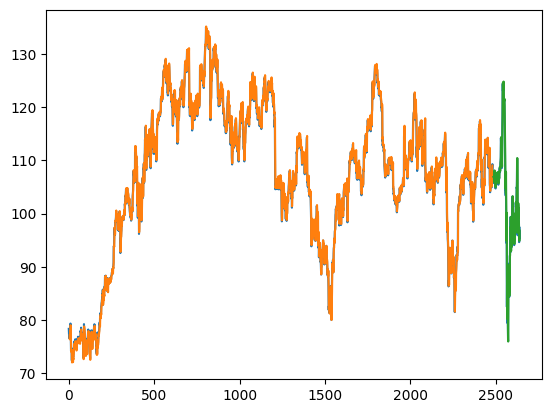

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#Stacked LSTM with 1 hidden dense layer
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(None, seq_size)))
model.add(LSTM(25, activation='relu'))
model.add(Dense(16))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
#
model.summary()
#print('Train...')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, None, 50)          11200     
                                                                 
 lstm_2 (LSTM)               (None, 25)                7600      
                                                                 
 dense_2 (Dense)             (None, 16)                416       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 19,233
Trainable params: 19,233
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainX,trainY, epochs=500, validation_data=(testX,testY),verbose=2)

#############################################
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions back to prescaled values
#This is to compare with original input values
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Epoch 1/500
78/78 - 4s - loss: 0.1025 - val_loss: 0.0110 - 4s/epoch - 49ms/step
Epoch 2/500
78/78 - 0s - loss: 0.0074 - val_loss: 0.0048 - 309ms/epoch - 4ms/step
Epoch 3/500
78/78 - 0s - loss: 0.0023 - val_loss: 0.0039 - 320ms/epoch - 4ms/step
Epoch 4/500
78/78 - 0s - loss: 0.0012 - val_loss: 0.0040 - 335ms/epoch - 4ms/step
Epoch 5/500
78/78 - 0s - loss: 9.8155e-04 - val_loss: 0.0037 - 305ms/epoch - 4ms/step
Epoch 6/500
78/78 - 0s - loss: 9.1705e-04 - val_loss: 0.0036 - 335ms/epoch - 4ms/step
Epoch 7/500
78/78 - 0s - loss: 8.8985e-04 - val_loss: 0.0035 - 332ms/epoch - 4ms/step
Epoch 8/500
78/78 - 0s - loss: 8.6470e-04 - val_loss: 0.0034 - 300ms/epoch - 4ms/step
Epoch 9/500
78/78 - 0s - loss: 8.3854e-04 - val_loss: 0.0034 - 326ms/epoch - 4ms/step
Epoch 10/500
78/78 - 0s - loss: 8.3187e-04 - val_loss: 0.0032 - 350ms/epoch - 4ms/step
Epoch 11/500
78/78 - 0s - loss: 7.8840e-04 - val_loss: 0.0031 - 341ms/epoch - 4ms/step
Epoch 12/500
78/78 - 0s - loss: 7.6338e-04 - val_loss: 0.0030 - 308ms/

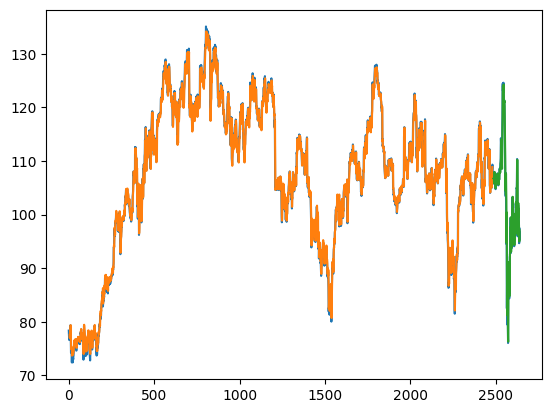

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#Bidirectional_LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(None, seq_size)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
print('Train...')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100)              22400     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 22,501
Trainable params: 22,501
Non-trainable params: 0
_________________________________________________________________
Train...


In [ ]:
model.fit(trainX,trainY, epochs=500, validation_data=(testX,testY),verbose=2)

#############################################
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions back to prescaled values
#This is to compare with original input values
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Epoch 1/500
78/78 - 4s - loss: 0.0873 - val_loss: 0.0046 - 4s/epoch - 50ms/step
Epoch 2/500
78/78 - 0s - loss: 0.0016 - val_loss: 0.0036 - 458ms/epoch - 6ms/step
Epoch 3/500
78/78 - 0s - loss: 0.0010 - val_loss: 0.0035 - 472ms/epoch - 6ms/step
Epoch 4/500
78/78 - 0s - loss: 8.8180e-04 - val_loss: 0.0035 - 471ms/epoch - 6ms/step
Epoch 5/500
78/78 - 0s - loss: 8.5492e-04 - val_loss: 0.0034 - 413ms/epoch - 5ms/step
Epoch 6/500
78/78 - 0s - loss: 8.3058e-04 - val_loss: 0.0033 - 294ms/epoch - 4ms/step
Epoch 7/500
78/78 - 0s - loss: 8.0858e-04 - val_loss: 0.0032 - 290ms/epoch - 4ms/step
Epoch 8/500
78/78 - 0s - loss: 7.8999e-04 - val_loss: 0.0033 - 310ms/epoch - 4ms/step
Epoch 9/500
78/78 - 0s - loss: 7.6710e-04 - val_loss: 0.0031 - 288ms/epoch - 4ms/step
Epoch 10/500
78/78 - 0s - loss: 7.3999e-04 - val_loss: 0.0030 - 281ms/epoch - 4ms/step
Epoch 11/500
78/78 - 0s - loss: 7.1522e-04 - val_loss: 0.0029 - 288ms/epoch - 4ms/step
Epoch 12/500
78/78 - 0s - loss: 6.8443e-04 - val_loss: 0.0028 - 31

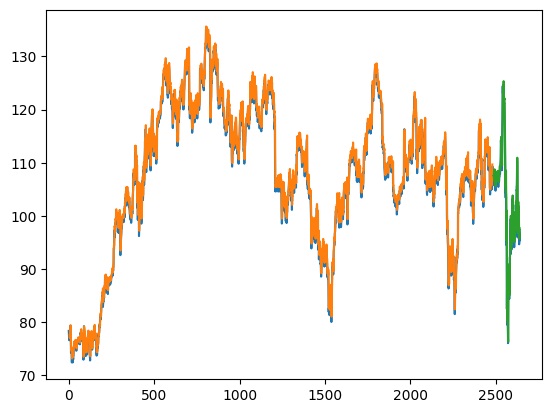

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
trainX = trainX.reshape((trainX.shape[0], 1, 1, 1, seq_size))
testX = testX.reshape((testX.shape[0], 1, 1, 1, seq_size))

In [ ]:
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 1, seq_size)))
model.add(Flatten())
model.add(Dense(16))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
#print('Train...')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 1, 1, 64)          17920     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                1040      
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 18,977
Trainable params: 18,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainX,trainY, epochs=500, validation_data=(testX,testY),verbose=2)

#############################################
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions back to prescaled values
#This is to compare with original input values
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Epoch 1/500
78/78 - 5s - loss: 0.0771 - val_loss: 0.0066 - 5s/epoch - 68ms/step
Epoch 2/500
78/78 - 0s - loss: 0.0021 - val_loss: 0.0039 - 364ms/epoch - 5ms/step
Epoch 3/500
78/78 - 0s - loss: 8.9179e-04 - val_loss: 0.0037 - 380ms/epoch - 5ms/step
Epoch 4/500
78/78 - 0s - loss: 8.4790e-04 - val_loss: 0.0035 - 381ms/epoch - 5ms/step
Epoch 5/500
78/78 - 0s - loss: 8.0062e-04 - val_loss: 0.0032 - 362ms/epoch - 5ms/step
Epoch 6/500
78/78 - 0s - loss: 7.7321e-04 - val_loss: 0.0031 - 360ms/epoch - 5ms/step
Epoch 7/500
78/78 - 0s - loss: 7.2357e-04 - val_loss: 0.0029 - 378ms/epoch - 5ms/step
Epoch 8/500
78/78 - 0s - loss: 6.9069e-04 - val_loss: 0.0027 - 356ms/epoch - 5ms/step
Epoch 9/500
78/78 - 0s - loss: 6.5248e-04 - val_loss: 0.0026 - 359ms/epoch - 5ms/step
Epoch 10/500
78/78 - 0s - loss: 6.3232e-04 - val_loss: 0.0025 - 345ms/epoch - 4ms/step
Epoch 11/500
78/78 - 0s - loss: 5.9154e-04 - val_loss: 0.0024 - 388ms/epoch - 5ms/step
Epoch 12/500
78/78 - 0s - loss: 5.6239e-04 - val_loss: 0.0022 

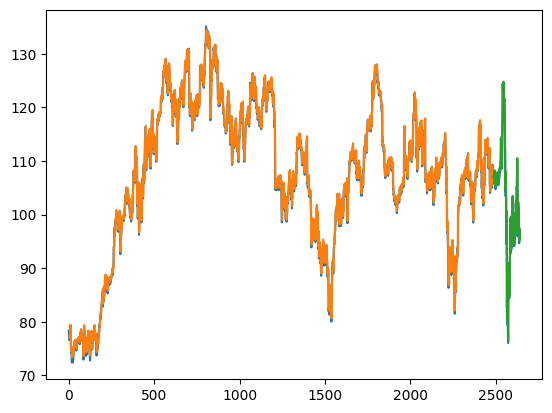

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#Multivariate_LSTM

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('IBM Research.csv')
print(df.head()) #7 columns, including the Date.

         Date        Open        High         Low       Close  Adj Close  \
0  2010-01-04  125.411087  127.122368  125.095604  126.625237  78.345901   
1  2010-01-05  125.889099  126.051628  124.378586  125.095604  77.399445   
2  2010-01-06  124.933075  125.707458  124.101341  124.282982  76.896667   
3  2010-01-07  124.158699  124.521988  123.240921  123.852776  76.630470   
4  2010-01-08  123.393883  125.162521  123.374763  125.095604  77.399445   

    Volume  
0  6438444  
1  7156104  
2  5863144  
3  6109268  
4  4390271  


In [ ]:
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15)) #Check last few dates.

2625   2020-06-09
2626   2020-06-10
2627   2020-06-11
2628   2020-06-12
2629   2020-06-15
2630   2020-06-16
2631   2020-06-17
2632   2020-06-18
2633   2020-06-19
2634   2020-06-22
2635   2020-06-23
2636   2020-06-24
2637   2020-06-25
2638   2020-06-26
2639   2020-06-29
Name: Date, dtype: datetime64[ns]


In [ ]:
#Variables for training
cols = list(df)[1:6]
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']
#Date and volume columns are not used in training.

['Open', 'High', 'Low', 'Close', 'Adj Close']


In [ ]:
df_for_training = df[cols].astype(float)

In [ ]:
df_for_training

,Open,High,Low,Close,Adj Close
0,125.411087,127.122368,125.095604,126.625237,78.345901
1,125.889099,126.051628,124.378586,125.095604,77.399445
2,124.933075,125.707458,124.101341,124.282982,76.896667
3,124.158699,124.521988,123.240921,123.852776,76.630470
4,123.393883,125.162521,123.374763,125.095604,77.399445
...,...,...,...,...,...
2635,116.644356,117.495216,113.986618,114.158699,97.076393
2636,113.116638,113.116638,110.783936,111.300194,94.645622
2637,111.625237,113.967499,110.994263,113.795410,96.767464
2638,113.059273,113.757172,111.147224,112.036331,95.271606


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_for_training, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_for_training, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_for_training, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_for_training, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_for_training, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_for_training, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_for_training, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_for_training, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_for_training, *[[['Open', 'High'], ['High', 'Low'], ['Low', 'Close'], ['Close', 'Adj Close']]], **{})
chart

In [ ]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features.
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training).

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))
print(trainX.shape)

trainX shape == (2626, 14, 5).
trainY shape == (2626, 1).
(2626, 14, 5)


In [ ]:
# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()
print(trainX.shape)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 14, 64)            17920     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________
(2626, 14, 5)


Epoch 1/100
148/148 [==============================] - 6s 42ms/step - loss: 0.0322 - val_loss: 0.0183
Epoch 2/100
148/148 [==============================] - 4s 26ms/step - loss: 0.0332 - val_loss: 0.0147
Epoch 3/100
148/148 [==============================] - 3s 19ms/step - loss: 0.0301 - val_loss: 0.0573
Epoch 4/100
148/148 [==============================] - 4s 27ms/step - loss: 0.0273 - val_loss: 0.0335
Epoch 5/100
148/148 [==============================] - 3s 18ms/step - loss: 0.0261 - val_loss: 0.0104
Epoch 6/100
148/148 [==============================] - 3s 18ms/step - loss: 0.0291 - val_loss: 0.0174
Epoch 7/100
148/148 [==============================] - 3s 18ms/step - loss: 0.0280 - val_loss: 0.0094
Epoch 8/100
148/148 [==============================] - 4s 25ms/step - loss: 0.0259 - val_loss: 0.0087
Epoch 9/100
148/148 [==============================] - 3s 20ms/step - loss: 0.0279 - val_loss: 0.0129
Epoch 10/100
148/148 [==============================] - 3s 18ms/step - loss: 0.026

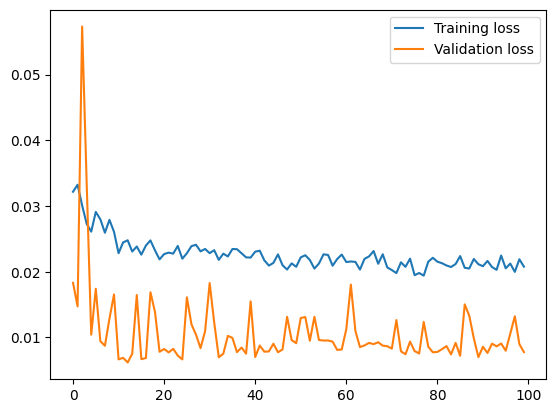

In [ ]:
history = model.fit(trainX, trainY, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
# Predicting...
# Libraries that will help us extract only business days in the US.
# Otherwise, our dates would be wrong when we look back (or forward).
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_cbd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

# Remember that we can only predict one day in the future as our model needs 5 variables
# as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 145
n_days_for_prediction = 145  # let us predict the next 145 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_cbd).tolist()
print(predict_period_dates)

# Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:])


[Timestamp('2019-12-02 00:00:00', freq='C'), Timestamp('2019-12-03 00:00:00', freq='C'), Timestamp('2019-12-04 00:00:00', freq='C'), Timestamp('2019-12-05 00:00:00', freq='C'), Timestamp('2019-12-06 00:00:00', freq='C'), Timestamp('2019-12-09 00:00:00', freq='C'), Timestamp('2019-12-10 00:00:00', freq='C'), Timestamp('2019-12-11 00:00:00', freq='C'), Timestamp('2019-12-12 00:00:00', freq='C'), Timestamp('2019-12-13 00:00:00', freq='C'), Timestamp('2019-12-16 00:00:00', freq='C'), Timestamp('2019-12-17 00:00:00', freq='C'), Timestamp('2019-12-18 00:00:00', freq='C'), Timestamp('2019-12-19 00:00:00', freq='C'), Timestamp('2019-12-20 00:00:00', freq='C'), Timestamp('2019-12-23 00:00:00', freq='C'), Timestamp('2019-12-24 00:00:00', freq='C'), Timestamp('2019-12-26 00:00:00', freq='C'), Timestamp('2019-12-27 00:00:00', freq='C'), Timestamp('2019-12-30 00:00:00', freq='C'), Timestamp('2019-12-31 00:00:00', freq='C'), Timestamp('2020-01-02 00:00:00', freq='C'), Timestamp('2020-01-03 00:00:00'

<ipython-input-59-6b40bdfdd18a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


<Axes: xlabel='Date', ylabel='Open'>

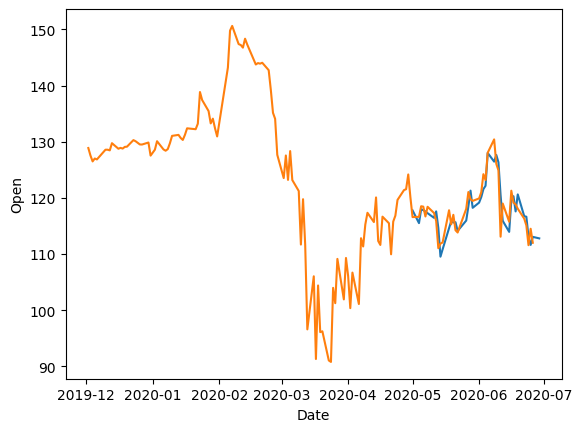

In [ ]:
#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(x=original['Date'], y=original['Open'])2
sns.lineplot(x=df_forecast['Date'], y=df_forecast['Open'])


In [ ]:
y_pred_future

array([128.87967 , 127.53595 , 126.494064, 127.00771 , 126.84495 ,
       128.12648 , 128.57985 , 128.5748  , 128.46053 , 129.73851 ,
       128.75194 , 128.90158 , 128.78284 , 129.08054 , 129.11499 ,
       130.28476 , 130.09023 , 129.51323 , 129.49886 , 129.8541  ,
       127.526   , 128.58084 , 130.08968 , 128.6289  , 128.39778 ,
       128.68103 , 129.73386 , 131.04065 , 131.21703 , 130.67084 ,
       130.3171  , 131.22511 , 132.38492 , 132.22661 , 133.21037 ,
       138.84239 , 137.43013 , 135.46196 , 133.26015 , 134.10538 ,
       132.40009 , 130.93683 , 138.38658 , 140.74107 , 143.1936  ,
       149.77643 , 150.61523 , 147.38196 , 147.2149  , 146.74615 ,
       148.33882 , 147.31316 , 143.74748 , 143.99878 , 143.89844 ,
       144.05762 , 142.73956 , 139.2088  , 135.14528 , 134.07312 ,
       127.66295 , 123.522415, 127.55075 , 123.20589 , 128.33282 ,
       123.17347 , 121.225235, 111.689255, 119.76603 , 111.670494,
        96.59139 , 106.0391  ,  91.31323 , 104.40658 ,  96.104